In [189]:
import numpy as np
import scipy
import scipy.optimize as opt
from scipy.interpolate import interp1d
import matplotlib
import math
import matplotlib.pyplot as plt

# Experiment 5

In [190]:
current_nano_amps = np.array([0, 7, 32, 125, 338, 649, 1063, 1112, 1413, 2140, 2915, 4240, 5700, 7082])


In [191]:
power = np.array([2, 10, 70, 512, 1980, 4870, 8540, 8990, 13990, 25500, 38000, 64600, 92000, 127000])


Text(0.5, 1.0, 'Photocurrent v/s Intensity')

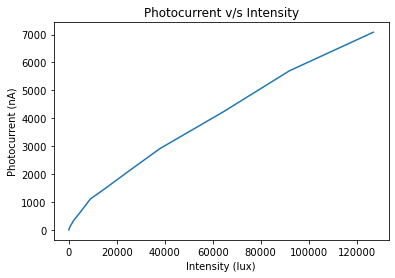

In [192]:
plt.plot(power, current_nano_amps)
plt.xlabel("Intensity (lux)")
plt.ylabel("Photocurrent (nA)")
plt.title("Photocurrent v/s Intensity")

Since it was easiest to find the stopping voltage for the blue LED, we used the blue LED for experiemnt 5 to produce the plot above. Clearly, a higher intensity produces a higher value of photocurrent. This is becase a more intense light means more photon hence more electrons will be ejected from the surface increasing the photocurrent. But this won't increase linearly. Eventually the electrons being ejected from the surface might create a certain resistance, making it harder for other electrons to be ejected. Eventually, the value of the photocurrent should even out, like an exponential decay of an increasing form. 

We use this model, then:
$Y=A(1-e^{-Bx})$
where Y is the photocurrent and x is the intensity

In [193]:
def model(x, A, B):
    return A*(1-np.exp(-B*x))

best-fit parameters:  9970.737342041339 9.371445927623648e-06


<ipython-input-193-2df06026d90c>:2: RuntimeWarning: overflow encountered in exp
  return A*(1-np.exp(-B*x))


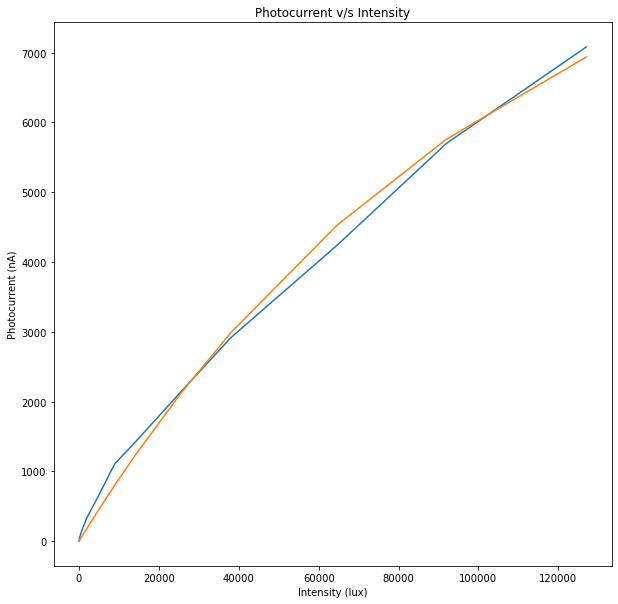

In [194]:
fig, ax = plt.subplots(figsize=(10,10))


ax.plot(power, current_nano_amps)

ax.set_xlabel("Intensity (lux)")
ax.set_ylabel("Photocurrent (nA)")
ax.set_title("Photocurrent v/s Intensity")

popt, pcov = scipy.optimize.curve_fit(model, power, current_nano_amps)
print('best-fit parameters: ', popt[0], popt[1])

ax.plot(power, popt[0]*(1-np.exp(-popt[1]*power)))

Fitting the model to our data gives the following figure above. Compare this to the linear model:

In [195]:
def model2(x, A, B):
    return A*x+B

best-fit parameters:  0.056640285237766125 353.5160675211331


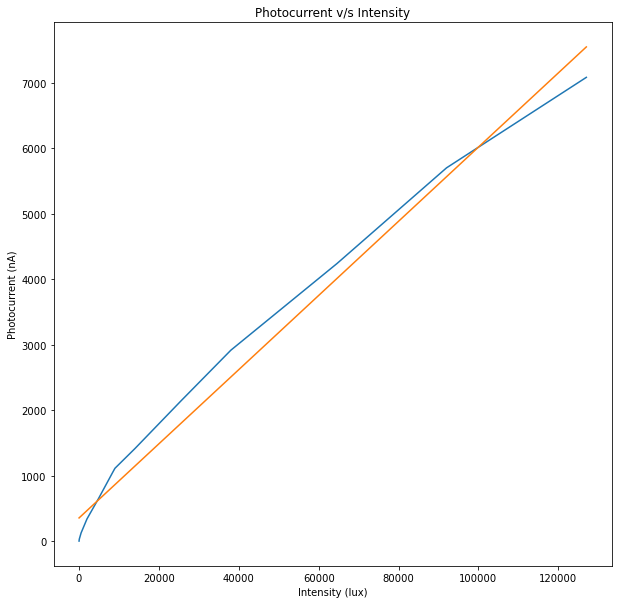

In [196]:
fig, ax = plt.subplots(figsize=(10,10))


ax.plot(power, current_nano_amps)

ax.set_xlabel("Intensity (lux)")
ax.set_ylabel("Photocurrent (nA)")
ax.set_title("Photocurrent v/s Intensity")

popt, pcov = scipy.optimize.curve_fit(model2, power, current_nano_amps)



print('best-fit parameters: ', popt[0], popt[1])

ax.plot(power, popt[0]*power+popt[1])

Clearly the exponential decay of an increasing form appears to be a good model compared to a linear model. 